In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('trainEDA.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
df.isnull().sum(), df.isna().sum()

(id                      0
 Gender                  0
 Age                     0
 Driving_License         0
 Region_Code             0
 Previously_Insured      0
 Vehicle_Age             0
 Vehicle_Damage          0
 Annual_Premium          0
 Policy_Sales_Channel    0
 Vintage                 0
 Response                0
 dtype: int64,
 id                      0
 Gender                  0
 Age                     0
 Driving_License         0
 Region_Code             0
 Previously_Insured      0
 Vehicle_Age             0
 Vehicle_Damage          0
 Annual_Premium          0
 Policy_Sales_Channel    0
 Vintage                 0
 Response                0
 dtype: int64)

# Descriptive Statistical Analysis

In [8]:
# 1
df['Age'].mean()

38.822583565331705

In [20]:
# 2
df['Annual_Premium'].mean()

30564.389581458323

In [22]:
# 3
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

In [23]:
# 4
df.groupby(by='Gender')['Age'].mean()

Gender
Female    36.372746
Male      40.903095
Name: Age, dtype: float64

In [24]:
# 5
df.groupby(by='Previously_Insured')['Annual_Premium'].mean()

Previously_Insured
0    30496.815760
1    30644.289198
Name: Annual_Premium, dtype: float64

In [25]:
# 6
df.groupby(by='Driving_License')['Annual_Premium'].mean()

Driving_License
0    34999.727833
1    30554.919366
Name: Annual_Premium, dtype: float64

In [26]:
# 7
df.groupby(by='Previously_Insured')['Annual_Premium'].var()

Previously_Insured
0    3.351930e+08
1    2.502867e+08
Name: Annual_Premium, dtype: float64

# Discrete Variable Analysis

<Axes: ylabel='Frequency'>

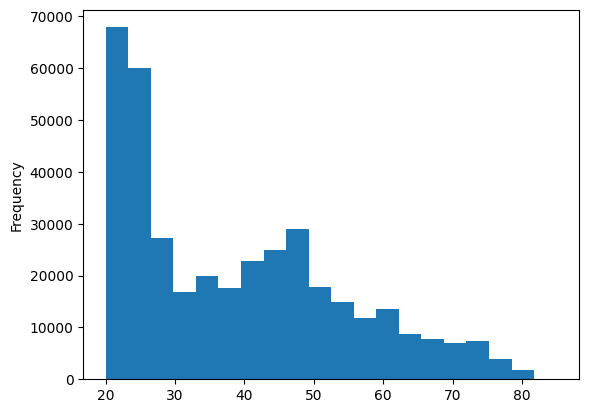

In [34]:
# 1
df['Age'].plot(kind='hist', bins=20)

In [39]:
# 2
df['Gender'].value_counts(normalize=True)

Gender
Male      0.540761
Female    0.459239
Name: proportion, dtype: float64

In [40]:
# 3
male_premium = df[df['Gender'] == 'Male']['Annual_Premium'].mean()
female_premium = df[df['Gender'] == 'Female']['Annual_Premium'].mean()
{
    "m": male_premium / (male_premium + female_premium),
    "f": female_premium / (male_premium + female_premium)
}

{'m': 0.5010378303055196, 'f': 0.4989621696944805}

In [50]:
# 4
pi_counts = df['Previously_Insured'].value_counts(normalize=True)
pi_counts

Previously_Insured
0    0.54179
1    0.45821
Name: proportion, dtype: float64

In [48]:
# 5
va_counts = df['Vehicle_Age'].value_counts(normalize=True)
va_counts

Vehicle_Age
1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: proportion, dtype: float64

In [52]:
# 6
df['Response'].value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

In [53]:
# 7
df[df['Vehicle_Age'] == '< 1 Year']['Response'].value_counts(normalize=True)

Response
0    0.956295
1    0.043705
Name: proportion, dtype: float64

In [54]:
# 8
df[df['Previously_Insured'] == 1]['Response'].value_counts(normalize=True)

Response
0    0.999095
1    0.000905
Name: proportion, dtype: float64

# Continuous Variable Analysis

In [62]:
# 1
len(df[df['Annual_Premium'] > 30500][df['Age'] < 30]) / len(df[df['Age'] < 30]), len(df[df['Annual_Premium'] > 30500][df['Age'] > 30]) / len(df[df['Age'] > 30])

/tmp/ipykernel_15642/3121384239.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Annual_Premium'] > 30500][df['Age'] < 30]) / len(df[df['Age'] < 30]), len(df[df['Annual_Premium'] > 30500][df['Age'] > 30]) / len(df[df['Age'] > 30])
/tmp/ipykernel_15642/3121384239.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Annual_Premium'] > 30500][df['Age'] < 30]) / len(df[df['Age'] < 30]), len(df[df['Annual_Premium'] > 30500][df['Age'] > 30]) / len(df[df['Age'] > 30])


(0.5028382183334085, 0.5771233974358975)

In [70]:
# 2
len(df[df['Annual_Premium'] > 30500][df['Age'] > 30][df['Previously_Insured'] == 0]) / len(df[df['Age'] > 30][df['Previously_Insured'] == 0]), len(df[df['Annual_Premium'] > 30500][df['Age'] < 30][df['Previously_Insured'] == 1]) / len(df[df['Age'] < 30][df['Previously_Insured'] == 1])

/tmp/ipykernel_15642/3747380008.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Annual_Premium'] > 30500][df['Age'] > 30][df['Previously_Insured'] == 0]) / len(df[df['Age'] > 30][df['Previously_Insured'] == 0]), len(df[df['Annual_Premium'] > 30500][df['Age'] < 30][df['Previously_Insured'] == 1]) / len(df[df['Age'] < 30][df['Previously_Insured'] == 1])
/tmp/ipykernel_15642/3747380008.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Annual_Premium'] > 30500][df['Age'] > 30][df['Previously_Insured'] == 0]) / len(df[df['Age'] > 30][df['Previously_Insured'] == 0]), len(df[df['Annual_Premium'] > 30500][df['Age'] < 30][df['Previously_Insured'] == 1]) / len(df[df['Age'] < 30][df['Previously_Insured'] == 1])
/tmp/ipykernel_15642/3747380008.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Annual_Premium'] > 30500][df['Age'] > 30][df['Previously_Insured'] == 0

(0.589107497393741, 0.5065978310916055)

# Variable Correlation Analysis

<Axes: xlabel='Age', ylabel='Annual_Premium'>

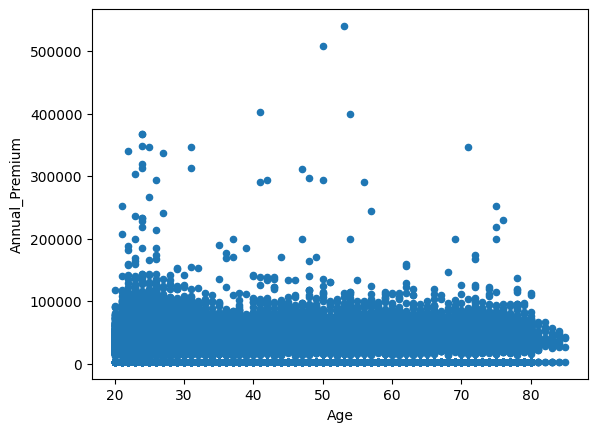

In [77]:
df[df['Previously_Insured'] == 1].plot(kind='scatter', x='Age', y='Annual_Premium')

0.02687233319314488


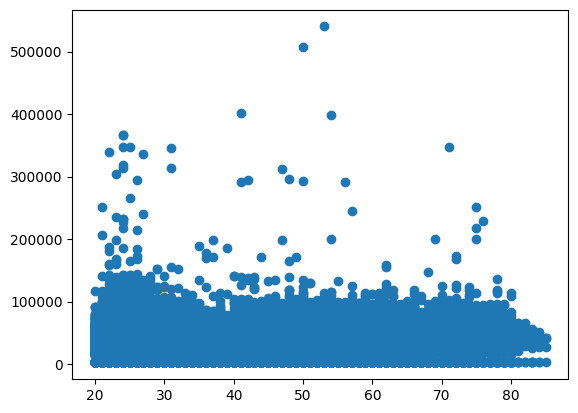

In [74]:
# 2
print(df['Age'][df['Previously_Insured'] == 1].corr(df['Annual_Premium']))
plt.scatter(df['Age'][df['Previously_Insured'] == 1], df['Annual_Premium'][df['Previously_Insured'] == 1])

0.12395984204766095


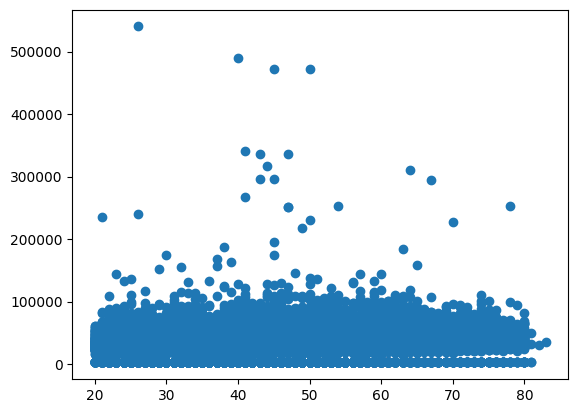

In [76]:
print(df['Age'][df['Response'] == 1].corr(df['Annual_Premium']))
plt.scatter(df['Age'][df['Response'] == 1], df['Annual_Premium'][df['Response'] == 1])

-0.08218165200945016


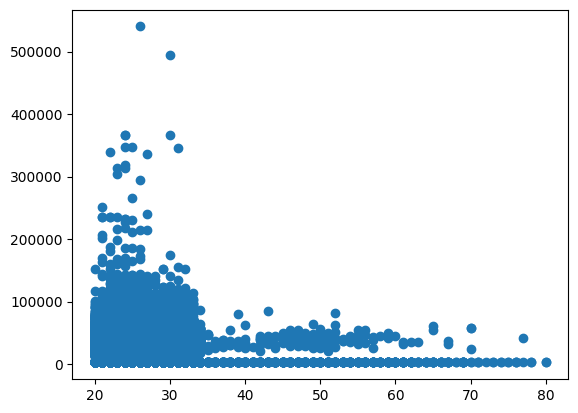

In [79]:
print(df['Age'][df['Vehicle_Age'] == '< 1 Year'].corr(df['Annual_Premium'][df['Vehicle_Age'] == '< 1 Year']))
plt.scatter(df['Age'][df['Vehicle_Age'] == '< 1 Year'], df['Annual_Premium'][df['Vehicle_Age'] == '< 1 Year'])